In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('glassdoor_jobs.csv')

## Dropping Columns

In [3]:
drop_columns = ['Company Name','Competitors','Industry']
df.drop(columns = 'Unnamed: 0', inplace = True)
df.drop(columns = drop_columns, inplace = True)
df

,Job Title,Salary Estimate,Job Description,Rating,Location,Headquarters,Size,Founded,Type of ownership,Sector,Revenue
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,$50 to $100 million (USD)
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care,$2 to $5 billion (USD)
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Business Services,$100 to $500 million (USD)
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD)
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Business Services,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...
951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Information Technology,$100 to $500 million (USD)
952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Education,Unknown / Non-Applicable
953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Business Services,$5 to $10 million (USD)
954,Data Engineer,-1,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,"Austin, TX","Portland, OR",201 to 500 employees,2015,Company - Private,Information Technology,$25 to $50 million (USD)


## Creating New Variables

### Skills

In [4]:
# python column
df['python'] = df['Job Description'].apply(lambda x:  1 if 'ython' in x else 0)

# R column
df['R'] = df['Job Description'].apply(lambda x: 1 if len(re.findall(r'[\W]R[\n ,.]+', x)) >= 1 else 0)

# spark column
df['spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

# aws column
df['aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

# excel column
df['excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

### Level

In [5]:
def level(x):
    if 'Senior' in x or 'Sr' in x or 'Chief' in x:
        return 'senior'
    elif 'Associate' in x or 'Intern' in x or 'Junior' in x or 'Jr' in x:
        return 'junior'
    else:
        return 'normal' 

In [6]:
df['Level'] = df['Job Title'].apply(lambda x: level(x))

In [7]:
df['Level'].value_counts()

Level
normal    709
senior    213
junior     34
Name: count, dtype: int64

### Company Age

In [8]:
def age(cell):
    if cell == -1:
        return None
    else:
        years = 2024 - int(cell)
        return years

df['Company Age'] = df['Founded'].apply(age)

### Recoding

### Job Title

In [9]:
df['Job Title'].value_counts()

Job Title
Data Scientist                       178
Data Engineer                         68
Senior Data Scientist                 42
Data Analyst                          18
Senior Data Engineer                  17
                                    ... 
Data Science Intern                    1
Environmental Scientist                1
Environmental Data Specialist          1
Data & Analytics Consultant (NYC)      1
Machine Learning Engineer (NLP)        1
Name: count, Length: 328, dtype: int64

In [10]:
def job_title_simple(x):
    if 'Machine Learning' in x or 'ML' in x:
        return 'ML engineer'
    elif 'Engineer' in x or 'Architect' in x or 'Modeler' in x:
        return 'data engineer'
    elif 'Director' in x:
        return 'director'
    elif 'Manager' in x:
        return 'manager'
    elif 'Data Scien' in x:
        return 'data scientist'
    elif 'Analyst' in x or 'Analytics' in x or 'ANALYTICS' in x:
        return 'analyst'
    elif 'Scientist' in x or 'SCIENTIST' in x:
        return 'scientist'
    else:
        return 'other' 

In [11]:
df['Job Title Simple'] = df['Job Title'].apply(lambda x: job_title_simple(x))

In [12]:
values = range(len(df['Job Title Simple']))
for i in values:
    if df['Job Title Simple'][i] =='other':
        print (df['Job Title'][i])

Data Management Specialist
Data Systems Specialist 2
Environmental Data Specialist
Data Operations Lead
Data Systems Specialist 2
Chief Data Officer
Technology-Minded, Data Professional Opportunities
Data Systems Specialist 2
Chief Data Officer
Technology-Minded, Data Professional Opportunities
Business Development - Data Supply Partnerships (Veraset)
Chief Data Officer


In [13]:
df['Job Title Simple'].value_counts()

Job Title Simple
data scientist    349
data engineer     193
scientist         178
analyst           130
ML engineer        40
manager            38
director           16
other              12
Name: count, dtype: int64

### Location

In [14]:
df['Location'].value_counts()

Location
New York, NY         78
San Francisco, CA    71
Cambridge, MA        59
Chicago, IL          37
Boston, MA           24
                     ..
Red Bank, NJ          1
San Ramon, CA         1
Woodinville, WA       1
Burlington, MA        1
Michigan              1
Name: count, Length: 237, dtype: int64

In [15]:
original_state_codes = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
                         'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
                         'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
                         'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
                         'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

state_mapping = {
    'AL': 'South', 'AK': 'West', 'AZ': 'West', 'AR': 'South', 'CA': 'West',
    'CO': 'West', 'CT': 'Northeast', 'DE': 'South', 'FL': 'South', 'GA': 'South',
    'HI': 'West', 'ID': 'West', 'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest',
    'KS': 'Midwest', 'KY': 'South', 'LA': 'South', 'ME': 'Northeast', 'MD': 'South',
    'MA': 'Northeast', 'MI': 'Midwest', 'MN': 'Midwest', 'MS': 'South', 'MO': 'Midwest',
    'MT': 'West', 'NE': 'Midwest', 'NV': 'West', 'NH': 'Northeast', 'NJ': 'Northeast',
    'NM': 'West', 'NY': 'Northeast', 'NC': 'South', 'ND': 'Midwest', 'OH': 'Midwest',
    'OK': 'South', 'OR': 'West', 'PA': 'Northeast', 'RI': 'Northeast', 'SC': 'South',
    'SD': 'Midwest', 'TN': 'South', 'TX': 'South', 'UT': 'West', 'VT': 'Northeast',
    'VA': 'South', 'WA': 'West', 'WV': 'South', 'WI': 'Midwest', 'WY': 'West'
}

def extract_and_recode(city_state):
    try:
        city, state = city_state.split(', ')
        if state in original_state_codes:
            return state_mapping.get(state, state)
        else:
            return "Unknown"
    except ValueError:
        return "Unknown"

In [16]:
df['Location Recoded'] = df['Location'].apply(extract_and_recode)

In [17]:
values = range(len(df))
for i in values:
    if df['Location Recoded'][i] =='Unknown':
        print (df['Location'][i])

Oregon
Washington, DC
New Jersey
Virginia
Washington, DC
Washington, DC
Santa Fe Springs, Los Angeles, CA
Washington, DC
Virginia
Oregon
United States
Washington, DC
Washington, DC
Virginia
Washington, DC
Washington, DC
Washington, DC
Washington, DC
Juncos, PR
New Jersey
Maryland
Washington, DC
Washington, DC
Michigan


In [18]:
for i in range(len(df)):
    if df['Location Recoded'][i]=='Unknown':
        if df['Location'][i] == 'Oregon' or df['Location'][i] == 'Washington, DC' or df['Location'][i]== 'Santa Fe Springs, Los Angeles, CA' :
            df['Location Recoded'][i]= 'West'
        elif df['Location'][i] == 'New Jersey':
            df['Location Recoded'][i]= 'Northeast'
        elif df['Location'][i] == 'Virginia' or df['Location'][i] == 'Maryland' or df['Location'][i] == 'Juncos, PR' :
            df['Location Recoded'][i]='South'
        elif df['Location'][i] == 'Michigan' or df['Location'][i] == 'United States':
            df['Location Recoded'][i]='Midwest'
            
# the company which has the location as United states was replaced with the location of the headquarters

C:\Users\Hiroo\AppData\Local\Temp\ipykernel_11708\385044197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location Recoded'][i]= 'West'
C:\Users\Hiroo\AppData\Local\Temp\ipykernel_11708\385044197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location Recoded'][i]= 'West'
C:\Users\Hiroo\AppData\Local\Temp\ipykernel_11708\385044197.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location Recoded'][i]= 'Northea

In [19]:
df['Location Recoded'].value_counts()

Location Recoded
West         304
Northeast    292
South        239
Midwest      121
Name: count, dtype: int64

### Headquarters

In [20]:
df['Headquarters'].value_counts()

Headquarters
New York, NY         75
San Francisco, CA    50
Chicago, IL          33
Cambridge, MA        22
Boston, MA           17
                     ..
Tempe, AZ             1
Camarillo, CA         1
Aurora, CO            1
Fort Worth, TX        1
Novi, MI              1
Name: count, Length: 235, dtype: int64

In [21]:
values = range(len(df))
for i in values:
    if df['Headquarters'][i]== '-1':
        df['Headquarters'][i] = df['Location'][i]

C:\Users\Hiroo\AppData\Local\Temp\ipykernel_11708\747379884.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Headquarters'][i] = df['Location'][i]
C:\Users\Hiroo\AppData\Local\Temp\ipykernel_11708\747379884.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Headquarters'][i] = df['Location'][i]
C:\Users\Hiroo\AppData\Local\Temp\ipykernel_11708\747379884.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Headquarters'][

In [22]:
df['Headquarters Recoded'] = df['Headquarters'].apply(extract_and_recode)

for i in range(len(df)):
    if df['Headquarters Recoded'][i]=='Unknown':
        if df['Headquarters'][i] == 'Oregon' or df['Headquarters'][i] == 'Washington, DC' or df['Headquarters'][i]== 'Santa Fe Springs, Los Angeles, CA' :
            df['Headquarters Recoded'][i]= 'West'
        elif df['Headquarters'][i] == 'New Jersey':
            df['Headquarters Recoded'][i]= 'Northeast'
        elif df['Headquarters'][i] == 'Virginia' or df['Headquarters'][i] == 'Maryland' or df['Headquarters'][i] == 'Juncos, PR' or df['Headquarters'][i] == 'Guaynabo, PR':
            df['Headquarters Recoded'][i]='South'
        elif df['Headquarters'][i] == 'Michigan' or df['Headquarters'][i] == 'United States':
            df['Headquarters Recoded'][i]='Midwest'

C:\Users\Hiroo\AppData\Local\Temp\ipykernel_11708\2114521670.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Headquarters Recoded'][i]= 'West'
C:\Users\Hiroo\AppData\Local\Temp\ipykernel_11708\2114521670.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Headquarters Recoded'][i]= 'West'
C:\Users\Hiroo\AppData\Local\Temp\ipykernel_11708\2114521670.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Headquarters Recoded

In [23]:
values = range(len(df))
for i in values:
    if df['Headquarters Recoded'][i] =='Unknown':
        print (df['Headquarters'][i])

OSAKA, Japan
Basel, Switzerland
Gottingen, Germany
London, United Kingdom
Zurich, Switzerland
Gottingen, Germany
Louvain-la-Neuve, Belgium
Beijing, China
OSAKA, Japan
London, United Kingdom
OSAKA, Japan
OSAKA, Japan
OSAKA, Japan
OSAKA, Japan
Hamilton, Bermuda
Seoul, South Korea
OSAKA, Japan
OSAKA, Japan
OSAKA, Japan
OSAKA, Japan
Hamilton, Bermuda
Mumbai, India
Zurich, Switzerland
OSAKA, Japan
Basel, Switzerland
Basel, Switzerland
Singapore, Singapore
Bengaluru, India
OSAKA, Japan
Basel, Switzerland
Cambridge, United Kingdom
London, United Kingdom
Basel, Switzerland
Madrid, Spain
London, United Kingdom
Paris, France
Gottingen, Germany
Singapore, Singapore
London, United Kingdom
Noida, India
Paris, France
Bengaluru, India
Cambridge, United Kingdom
Cambridge, United Kingdom
OSAKA, Japan
Seoul, South Korea
Brentford, United Kingdom
Basel, Switzerland
Cambridge, United Kingdom
Zurich, Switzerland
Gottingen, Germany
London, United Kingdom
Basel, Switzerland
Basel, Switzerland
Brentford, Unit

In [24]:
values = range(len(df))
for i in values:
    if df['Headquarters Recoded'][i] =='Unknown':
        df['Headquarters Recoded'][i] ='Other Countries'

C:\Users\Hiroo\AppData\Local\Temp\ipykernel_11708\1016472318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Headquarters Recoded'][i] ='Other Countries'
C:\Users\Hiroo\AppData\Local\Temp\ipykernel_11708\1016472318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Headquarters Recoded'][i] ='Other Countries'
C:\Users\Hiroo\AppData\Local\Temp\ipykernel_11708\1016472318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

In [25]:
df['Headquarters Recoded'].value_counts()

Headquarters Recoded
West               306
Northeast          256
South              212
Midwest            106
Other Countries     76
Name: count, dtype: int64

### Size

In [26]:
df['Size'].value_counts()

Size
1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
-1                          11
Name: count, dtype: int64

In [27]:
def size(x):
    if x =='1 to 50 employees'  or x =='51 to 200 employees':
        return '1 to 200 employees'
    elif x=='201 to 500 employees' or x=='501 to 1000 employees' :
        return '201 to 1000 employees'
    elif x=='1001 to 5000 employees' or x=='5001 to 10000 employees' :
        return '1001 to 10000 employees'
    else:
        return x

In [28]:
df['Size'] = df['Size'].apply(lambda x: size(x))

In [29]:
df['Size'].replace('Unknown', '-1', inplace = True)

In [30]:
df['Size'].value_counts()

Size
201 to 1000 employees      304
1001 to 10000 employees    256
1 to 200 employees         216
10000+ employees           154
-1                          26
Name: count, dtype: int64

### Type of Ownership

In [31]:
df['Type of ownership'].value_counts()

Type of ownership
Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
Hospital                           15
College / University               15
Unknown                            11
-1                                 11
Other Organization                  5
Contract                            5
School / School District            2
Private Practice / Firm             1
Name: count, dtype: int64

In [32]:
df['Type of ownership'].replace('Unknown','-1', inplace = True)

c = ('-1','College / University', 'School / School District', 'Government', 'Hospital','Other Organization', 'Contract', 'Private Practice / Firm')
for i in c:
    df['Type of ownership'].replace(i , 'Other', inplace = True)

In [33]:
df['Type of ownership'].value_counts()

Type of ownership
Company - Private                 532
Company - Public                  237
Other                              82
Nonprofit Organization             65
Subsidiary or Business Segment     40
Name: count, dtype: int64

### Sector

In [34]:
df['Sector'].value_counts()

Sector
Information Technology                239
Biotech & Pharmaceuticals             148
Business Services                     134
Insurance                              71
Finance                                56
Health Care                            51
Manufacturing                          40
-1                                     39
Aerospace & Defense                    32
Education                              26
Retail                                 16
Non-Profit                             16
Oil, Gas, Energy & Utilities           15
Media                                  13
Government                             13
Transportation & Logistics              8
Real Estate                             8
Travel & Tourism                        8
Telecommunications                      6
Arts, Entertainment & Recreation        4
Construction, Repair & Maintenance      4
Consumer Services                       4
Mining & Metals                         3
Agriculture & Forestry     

In [35]:
sector_mapping = {
    'Information Technology': 'Technology',
    'Biotech & Pharmaceuticals': 'Healthcare',
    'Business Services': 'Services',
    'Insurance': 'Finance & Insurance',
    'Finance': 'Finance & Insurance',
    'Health Care': 'Healthcare',
    'Manufacturing': 'Manufacturing',
    '-1': 'Other',
    'Aerospace & Defense': 'Manufacturing',
    'Education': 'Education',
    'Retail': 'Retail',
    'Non-Profit': 'Services',
    'Oil, Gas, Energy & Utilities': 'Energy',
    'Media': 'Media',
    'Government': 'Services',
    'Transportation & Logistics': 'Other',
    'Real Estate': 'Other',
    'Travel & Tourism': 'Services',
    'Telecommunications': 'Media',
    'Arts, Entertainment & Recreation': 'Media',
    'Construction, Repair & Maintenance': 'Services',
    'Consumer Services': 'Services',
    'Mining & Metals': 'Manufacturing',
    'Agriculture & Forestry': 'Other',
    'Accounting & Legal': 'Finance & Insurance'
}

df['Sector'] = df['Sector'].map(sector_mapping)

In [36]:
df['Sector'].value_counts()

Sector
Technology             239
Healthcare             199
Services               179
Finance & Insurance    128
Manufacturing           75
Other                   56
Education               26
Media                   23
Retail                  16
Energy                  15
Name: count, dtype: int64

### Revenue

In [37]:
df['Revenue'].value_counts()

Revenue
Unknown / Non-Applicable            299
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
-1                                   11
Less than $1 million (USD)            9
Name: count, dtype: int64

In [38]:
rev_mapping = {'$10+ billion (USD)': '$10+ billion (USD)',
    '$5 to $10 billion (USD)': '$1 to $10 billion (USD)',
    '$2 to $5 billion (USD)': '$1 to $10 billion (USD)',
    '$1 to $2 billion (USD)': '$1 to $10 billion (USD)',
    '$500 million to $1 billion (USD)': '$100 million to $1 billion (USD)',
    '$100 to $500 million (USD)': '$100 million to $1 billion (USD)',
    '$50 to $100 million (USD)': '$10 to $100 million (USD)',
    '$25 to $50 million (USD)': '$10 to $100 million (USD)',
    '$10 to $25 million (USD)': '$10 to $100 million (USD)',
    '$5 to $10 million (USD)': '$1 to $10 million (USD)',
    '$1 to $5 million (USD)': '$1 to $10 million (USD)',
    'Less than $1 million (USD)': 'Less than $1 million (USD)',
    'Unknown / Non-Applicable':'-1',
    '-1':'-1'
}

df['Revenue'] = df['Revenue'].map(rev_mapping)

In [39]:
df['Revenue'].value_counts()

Revenue
-1                                  310
$100 million to $1 billion (USD)    169
$10 to $100 million (USD)           150
$10+ billion (USD)                  140
$1 to $10 billion (USD)             132
$1 to $10 million (USD)              46
Less than $1 million (USD)            9
Name: count, dtype: int64

### Salary Estimate

In [40]:
df['Salary Estimate'].replace('Unknown / Non-Applicable', 'Unknown', inplace = True)
df['Salary Estimate'].replace('-1', 'Unknown', inplace = True)
df['Salary Estimate'].value_counts()

Salary Estimate
Unknown                             214
$86K-$143K (Glassdoor est.)           6
$54K-$115K (Glassdoor est.)           6
$49K-$113K (Glassdoor est.)           6
$21-$34 Per Hour(Glassdoor est.)      6
                                   ... 
$74K-$119K (Glassdoor est.)           1
$55K-$97K (Glassdoor est.)            1
$15K-$16K(Employer est.)              1
$61K-$106K (Glassdoor est.)           1
$62K-$113K (Glassdoor est.)           1
Name: count, Length: 417, dtype: int64

In [41]:
# converting per hour salaries to annual salaries assuming they work 40 hrs per week

df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'Per Hour' in x else 0)
df['Salary Estimate'][df['hourly']==1]

197             $17-$24 Per Hour(Glassdoor est.)
209             $21-$34 Per Hour(Glassdoor est.)
240             $18-$25 Per Hour(Glassdoor est.)
247             $21-$34 Per Hour(Glassdoor est.)
257             $15-$25 Per Hour(Glassdoor est.)
307             $17-$24 Per Hour(Glassdoor est.)
337             $21-$34 Per Hour(Glassdoor est.)
427             $18-$25 Per Hour(Glassdoor est.)
437             $24-$39 Per Hour(Glassdoor est.)
456             $21-$34 Per Hour(Glassdoor est.)
464    Employer Provided Salary:$25-$28 Per Hour
522             $21-$29 Per Hour(Glassdoor est.)
523             $10-$17 Per Hour(Glassdoor est.)
632             $18-$25 Per Hour(Glassdoor est.)
652             $24-$39 Per Hour(Glassdoor est.)
682             $21-$34 Per Hour(Glassdoor est.)
694    Employer Provided Salary:$25-$28 Per Hour
786             $21-$29 Per Hour(Glassdoor est.)
787             $10-$17 Per Hour(Glassdoor est.)
823             $27-$47 Per Hour(Glassdoor est.)
854             $18-

In [42]:
values = range(len(df))
for i in values:
    if df['hourly'][i] == 1:
        original_text = df['Salary Estimate'][i]
        matches = re.findall(r'\d+', original_text)
        numbers = [int(match) for match in matches]
        result_numbers = [int(num * 52*40/1000) for num in numbers]
        newtext = "${}K-${}K (Glassdoor est.)".format(result_numbers[0], result_numbers[1])
        df['Salary Estimate'][i] = newtext

C:\Users\Hiroo\AppData\Local\Temp\ipykernel_11708\3322491335.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Estimate'][i] = newtext
C:\Users\Hiroo\AppData\Local\Temp\ipykernel_11708\3322491335.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Estimate'][i] = newtext
C:\Users\Hiroo\AppData\Local\Temp\ipykernel_11708\3322491335.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Estimate'][i] = new

In [43]:
df['Salary Estimate'].value_counts()

Salary Estimate
Unknown                        214
$86K-$143K (Glassdoor est.)      6
$43K-$70K (Glassdoor est.)       6
$49K-$113K (Glassdoor est.)      6
$54K-$115K (Glassdoor est.)      6
                              ... 
$74K-$119K (Glassdoor est.)      1
$55K-$97K (Glassdoor est.)       1
$15K-$16K(Employer est.)         1
$61K-$106K (Glassdoor est.)      1
$62K-$113K (Glassdoor est.)      1
Name: count, Length: 416, dtype: int64

In [44]:
def Salary_Estimate_Simple(x):
    if x != 'Unknown':
        matches = re.findall(r'\d+', x)
        numbers = [int(match) for match in matches]
        result_numbers = [num for num in numbers]
        avg = (result_numbers[0] + result_numbers[1])/2

        if avg<=65:
            return 'low'
        elif avg<=150:
            return 'mid'
        else:
            return 'high'
    else:
        return 'Unknown'

In [45]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: Salary_Estimate_Simple(x))

In [46]:
df['Salary Estimate'].value_counts()

Salary Estimate
mid        535
Unknown    214
low        129
high        78
Name: count, dtype: int64

## Splitting into training and testing

In [47]:
import sklearn
from sklearn.model_selection import train_test_split

In [48]:
X = df.drop('Salary Estimate', axis=1)
Y = df['Salary Estimate']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Imputation

### Rating

In [49]:
X_train['Rating'].replace(-1, None, inplace=True)
X_test['Rating'].replace(-1, None, inplace=True)

rating_median = X_train['Rating'].median()

X_train['Rating'].fillna(round(rating_median,1), inplace=True)
X_test['Rating'].fillna(round(rating_median,1), inplace=True)

### Size

In [50]:
X_train['Size'].replace('-1', None, inplace=True)
X_test['Size'].replace('-1', None, inplace=True)

mode_category = X_train['Size'].mode()[0]

X_train['Size'].fillna(mode_category, inplace=True)
X_test['Size'].fillna(mode_category, inplace=True)

### Company Age

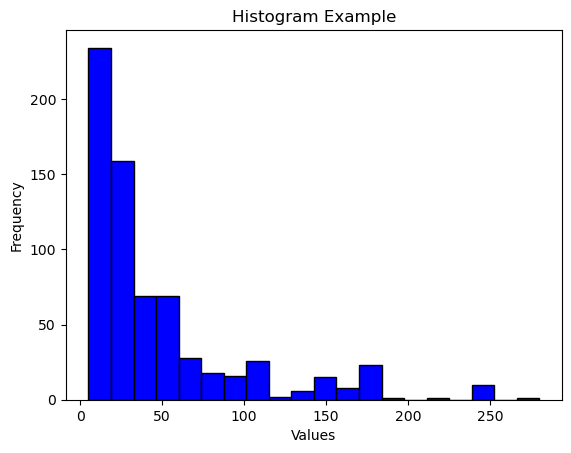

In [51]:
import matplotlib.pyplot as plt

plt.hist(X_train['Company Age'], bins=20, color='blue', edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Example')

plt.show()

In [52]:
age_median=int(X_train['Company Age'].median())

X_train['Company Age'].fillna(age_median, inplace=True)
X_test['Company Age'].fillna(age_median, inplace=True)

### Revenue

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Extract the rows with missing values for imputation
rev_missing = X_train[X_train['Revenue'] == '-1']

# Separate the data into known and unknown values
rev_known = X_train[X_train['Revenue'] != '-1']

# Features and response variable
categorical_features = ['Sector']
numeric_features = ['Company Age','Rating']  # Add your numerical features here

rev_X_known = rev_known[categorical_features + numeric_features]
rev_y_known = rev_known['Revenue']
rev_X_missing = rev_missing[categorical_features + numeric_features]
rev_y_missing = rev_missing['Revenue']

In [54]:
# Encode categorical features and standardize numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ])

# Train-test split for evaluation
rev_X_train, rev_X_test, rev_y_train, rev_y_test = train_test_split(rev_X_known, rev_y_known, test_size=0.2, random_state=42)

# Model with pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Fit the model
model.fit(rev_X_train, rev_y_train)

predicted_values = model.predict(rev_X_missing)

# Impute the missing values in the original DataFrame
X_train.loc[X_train['Revenue'] == '-1', 'Revenue'] = predicted_values   

# Evaluate the model on the test set
test_accuracy = model.score(rev_X_test, rev_y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.803921568627451


In [55]:
rev_missing = X_test[X_test['Revenue'] == '-1']
rev_X_missing = rev_missing[categorical_features + numeric_features]

predicted_values = model.predict(rev_X_missing)
X_test.loc[X_test['Revenue'] == '-1', 'Revenue'] = predicted_values

### Salary Estimate

In [56]:
# Extract the rows with missing values for imputation
# Extract the rows with missing values for imputation
sal_missing = X_train[y_train == 'Unknown']

# Separate the data into known and unknown values
sal_known = X_train[y_train != 'Unknown']

# Features and response variable
categorical_features = ['Job Title Simple']
numeric_features = ['Rating']  # Add your numerical features here

train_X_known = sal_known[categorical_features + numeric_features]
train_y_known = y_train[y_train != 'Unknown']
train_X_missing = sal_missing[categorical_features + numeric_features]

In [57]:
# Encode categorical features and standardize numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ])

# Train-test split for evaluation
X_train1, X_test1, y_train1, y_test1 = train_test_split(train_X_known, train_y_known, test_size=0.2, random_state=42)

# Model with pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Fit the model
model.fit(X_train1, y_train1)

# Predict missing values
predicted_values = model.predict(train_X_missing)

y_train.loc[y_train == 'Unknown'] = predicted_values

# Evaluate the model on the test set
test_accuracy = model.score(X_test1, y_test1)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7478991596638656


In [58]:
sal_missing = X_test[y_test == 'Unknown']
test_X_missing = sal_missing[categorical_features + numeric_features]

predicted_values = model.predict(test_X_missing)

y_test.loc[y_test == 'Unknown'] = predicted_values

In [59]:
drop_columns = ['Job Title','Job Description','Founded','hourly','Location','Headquarters']
X_train.drop(columns = drop_columns, inplace = True)
X_test.drop(columns = drop_columns, inplace = True)

In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 764 entries, 465 to 102
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rating                764 non-null    float64
 1   Size                  764 non-null    object 
 2   Type of ownership     764 non-null    object 
 3   Sector                764 non-null    object 
 4   Revenue               764 non-null    object 
 5   python                764 non-null    int64  
 6   R                     764 non-null    int64  
 7   spark                 764 non-null    int64  
 8   aws                   764 non-null    int64  
 9   excel                 764 non-null    int64  
 10  Level                 764 non-null    object 
 11  Company Age           764 non-null    float64
 12  Job Title Simple      764 non-null    object 
 13  Location Recoded      764 non-null    object 
 14  Headquarters Recoded  764 non-null    object 
dtypes: float64(2), int64(5), o

In [61]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 342 to 433
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rating                192 non-null    float64
 1   Size                  192 non-null    object 
 2   Type of ownership     192 non-null    object 
 3   Sector                192 non-null    object 
 4   Revenue               192 non-null    object 
 5   python                192 non-null    int64  
 6   R                     192 non-null    int64  
 7   spark                 192 non-null    int64  
 8   aws                   192 non-null    int64  
 9   excel                 192 non-null    int64  
 10  Level                 192 non-null    object 
 11  Company Age           192 non-null    float64
 12  Job Title Simple      192 non-null    object 
 13  Location Recoded      192 non-null    object 
 14  Headquarters Recoded  192 non-null    object 
dtypes: float64(2), int64(5), o

## Outlier Detection

In [62]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder

# Assuming 'X' is your mixed-type dataset, and 'y' is the response variable
features = X_train
response = y_train

# Define ordinal and categorical columns
binary_col = ['python','R','spark','aws','excel']
ordinal_cols = ["Size", "Revenue",'Level']
categorical_cols = ["Type of ownership", "Sector",'Job Title Simple','Location Recoded','Headquarters Recoded']

# Create transformers for numerical, ordinal, and categorical columns
numeric_transformer = StandardScaler()
ordinal_transformer = OrdinalEncoder()
categorical_transformer = OneHotEncoder()

# Create a column transformer to apply transformations to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, X.select_dtypes(include=['float64']).columns),
        ("ord", ordinal_transformer, ordinal_cols),
        ("cat", categorical_transformer, categorical_cols),
        ("bin", 'passthrough', binary_col),
    ])

# Create an Isolation Forest model
model = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0, random_state=42)  # Set an initial value, will be optimized later

# Create a pipeline with preprocessing and the Isolation Forest model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'model__contamination': [0.01, 0.05, 0.1, 0.15]
}

# Specify the scoring metric
scoring_metric = 'f1'  # Choose an appropriate metric for your use case (e.g., precision, recall, f1-score)

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring_metric, cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(features,response)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'model__contamination': 0.01}


c:\Users\Hiroo\anaconda3new\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


In [63]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.01),max_features=1.0, random_state = 42)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

pipeline.fit(features, response)

X_train['scores']=pipeline.decision_function(features)
X_train['anomaly']=pipeline.predict(features)
anomaly=X_train.loc[X_train['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

     Rating                     Size               Type of ownership  \
292     2.9    201 to 1000 employees          Nonprofit Organization   
525     3.9  1001 to 10000 employees          Nonprofit Organization   
798     3.8       1 to 200 employees                           Other   
369     3.0    201 to 1000 employees               Company - Private   
194     2.9    201 to 1000 employees          Nonprofit Organization   
224     3.0    201 to 1000 employees               Company - Private   
809     4.6       1 to 200 employees  Subsidiary or Business Segment   

         Sector                           Revenue  python  R  spark  aws  \
292   Education         $10 to $100 million (USD)       1  1      0    0   
525    Services  $100 million to $1 billion (USD)       1  0      0    1   
798       Other        Less than $1 million (USD)       1  0      1    1   
369  Healthcare  $100 million to $1 billion (USD)       1  0      0    1   
194   Education         $10 to $100 million

In [64]:
X_train_filtered = X_train[X_train['anomaly'] != -1]

In [65]:
y_train_filtered =  y_train[X_train['anomaly'] != -1]

In [66]:
X_train.drop(columns = ['anomaly','scores'], inplace = True)

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 764 entries, 465 to 102
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rating                764 non-null    float64
 1   Size                  764 non-null    object 
 2   Type of ownership     764 non-null    object 
 3   Sector                764 non-null    object 
 4   Revenue               764 non-null    object 
 5   python                764 non-null    int64  
 6   R                     764 non-null    int64  
 7   spark                 764 non-null    int64  
 8   aws                   764 non-null    int64  
 9   excel                 764 non-null    int64  
 10  Level                 764 non-null    object 
 11  Company Age           764 non-null    float64
 12  Job Title Simple      764 non-null    object 
 13  Location Recoded      764 non-null    object 
 14  Headquarters Recoded  764 non-null    object 
dtypes: float64(2), int64(5), o

## Descriptive Analysis

In [68]:
import seaborn as sns

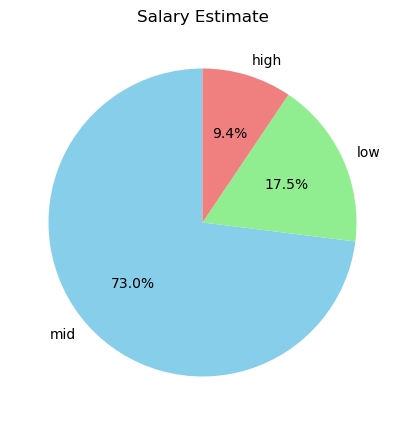

In [69]:
counts = y_train.value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Salary Estimate')
plt.show()

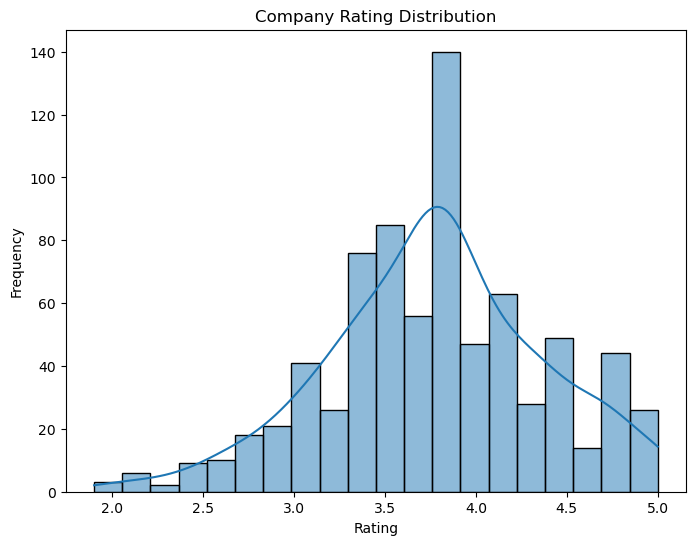

In [70]:
# Rating

plt.figure(figsize=(8, 6))
sns.histplot(X_train['Rating'], bins=20, kde=True)
plt.title('Company Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

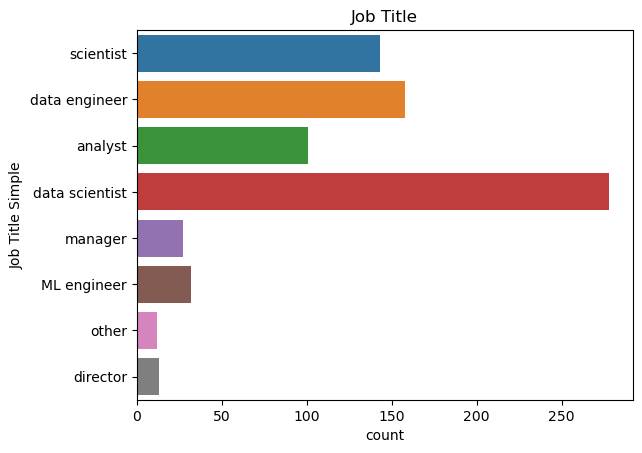

In [71]:
# Job title

sns.countplot(y='Job Title Simple', data=X_train)
plt.title('Job Title')
plt.show()

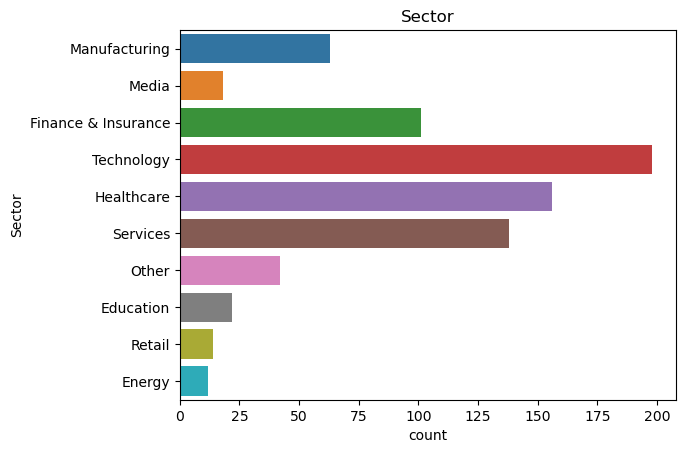

In [72]:
# Sector

sns.countplot(y='Sector', data=X_train)
plt.title('Sector')
plt.show()

Pearson Correlation Coefficient: -0.18101255326373272


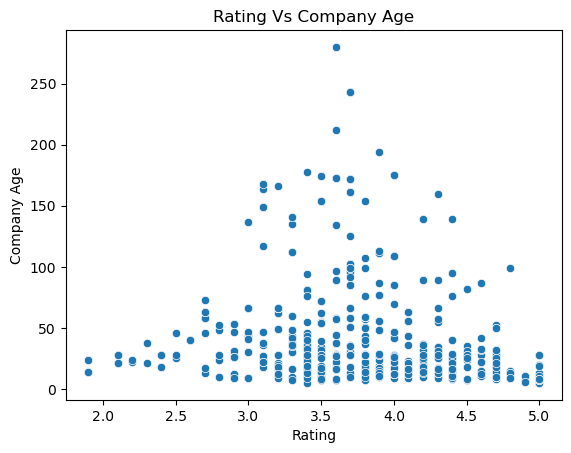

In [73]:
# Rating Vs Company Age

sns.scatterplot(data=X_train, x="Rating", y="Company Age").set(title = "Rating Vs Company Age")
correlation_coefficient = np.corrcoef(X_train['Rating'],X_train['Company Age'] )[0, 1]
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")

[Text(0.5, 1.0, 'Rating Vs Salary Estimate')]

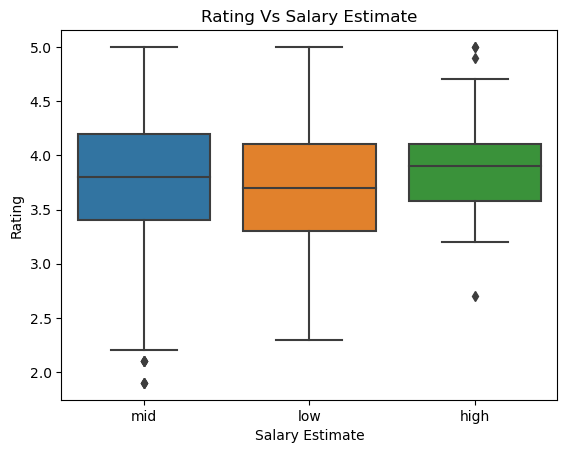

In [74]:
# Rating Vs Salary Estimate

sns.boxplot(x = y_train, 
            y = X_train['Rating']).set(title = 'Rating Vs Salary Estimate')

[Text(0.5, 1.0, 'Company Age Vs Salary Estimate')]

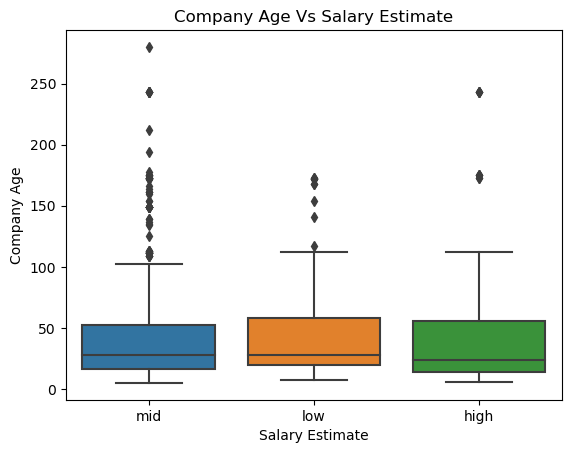

In [75]:
# Company Age Vs Salary Estimate

sns.boxplot(x = y_train, 
            y = X_train['Company Age']).set(title = 'Company Age Vs Salary Estimate')

[Text(0.5, 1.0, 'Headquarters vs Salary Estimate')]

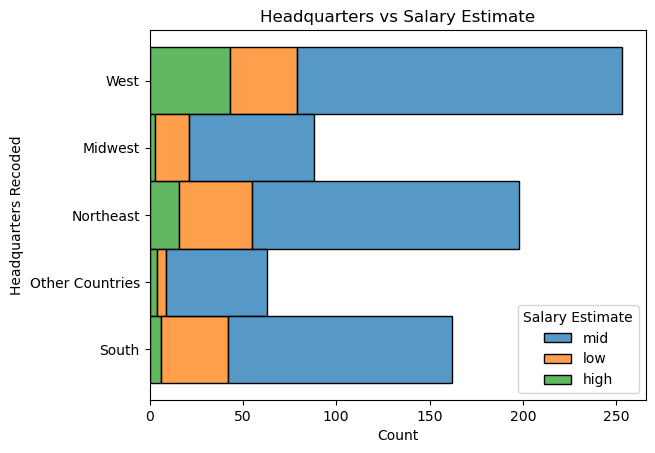

In [76]:
# headquarters and salary estimate

g=sns.histplot(data=X_train, y="Headquarters Recoded", hue=y_train, multiple="stack")
g.set(title='Headquarters vs Salary Estimate')

[Text(0.5, 1.0, 'Location vs Salary Estimate')]

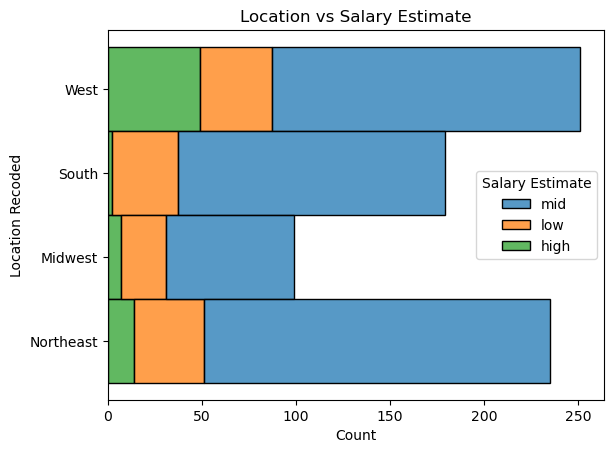

In [77]:
# location and salary estimate

g=sns.histplot(data=X_train, y="Location Recoded", hue=y_train, multiple="stack")
g.set(title='Location vs Salary Estimate')

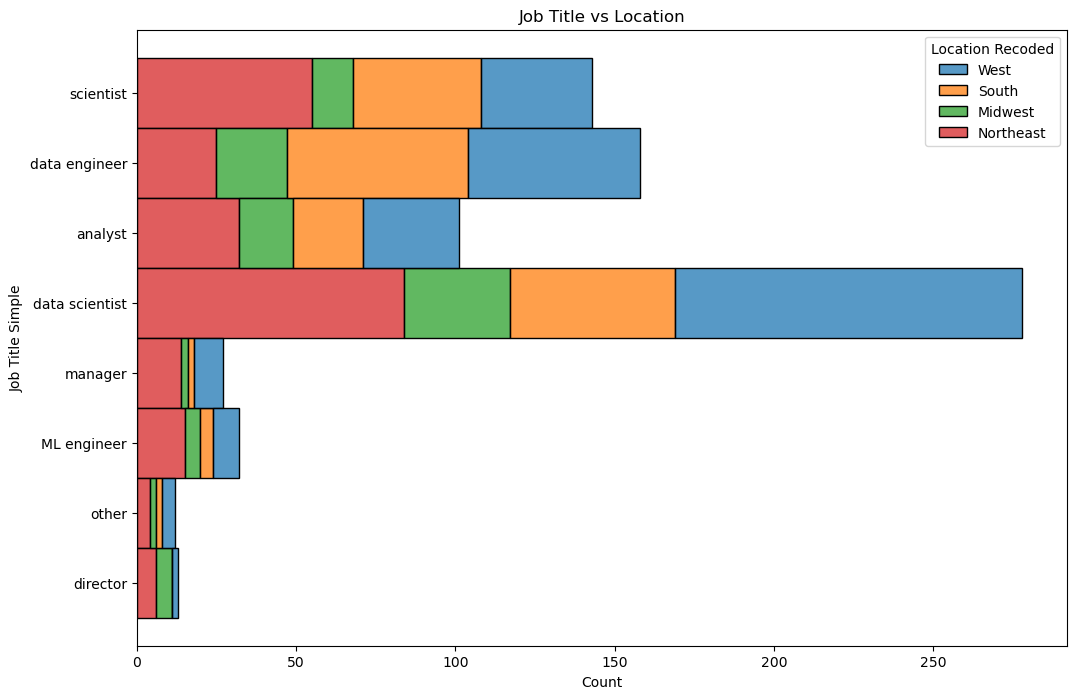

In [78]:
# Simplified Job Title and Location

plt.figure(figsize=(12, 8))

g=sns.histplot(data=X_train, y="Job Title Simple", hue="Location Recoded", multiple="stack")
g.set(title='Job Title vs Location')

plt.show()

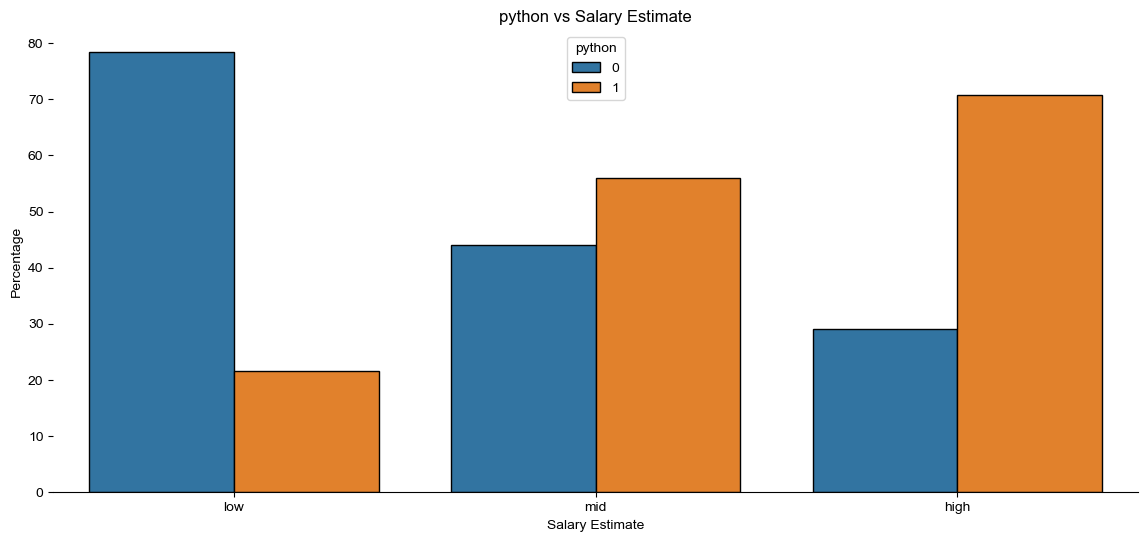

In [79]:
# Python Vs Salary Estimate

table = X_train.groupby(['python', y_train]).size().reset_index(name='Frequency')

table.columns = ["python", "Salary Estimate", "Frequency"]
table['Percentage'] = table.groupby('Salary Estimate')['Frequency'].transform(lambda x: x / x.sum() * 100)

plt.figure(figsize=(14, 6))
sns.barplot(data=table, x='Salary Estimate', y='Percentage', hue='python',  edgecolor='black', order=['low','mid','high']).set(title='python vs Salary Estimate')

sns.set_style("whitegrid")
sns.despine(left=True)
plt.show()


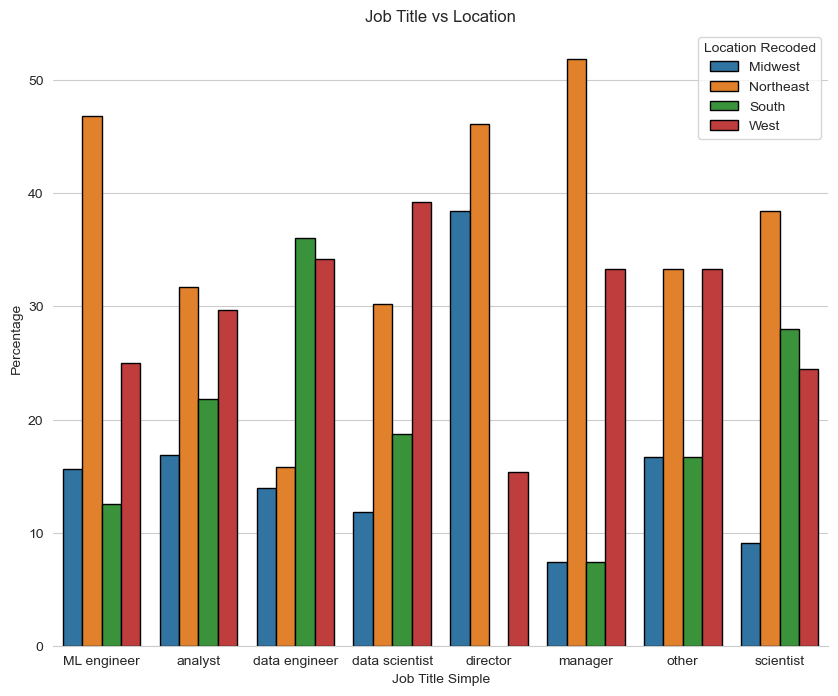

In [80]:
# Job Title Vs Location

table = X_train.groupby(['Job Title Simple', 'Location Recoded',]).size().reset_index(name='Frequency')
table['Percentage'] = table.groupby('Job Title Simple')['Frequency'].transform(lambda x: x / x.sum() * 100)
plt.figure(figsize=(10, 8))
sns.barplot(data=table, x='Job Title Simple', y='Percentage', hue='Location Recoded', edgecolor='black').set(title='Job Title vs Location')

sns.set_style("whitegrid")
sns.despine(left=True)
plt.show()

[Text(0.5, 1.0, 'Type of ownership vs Salary Estimate')]

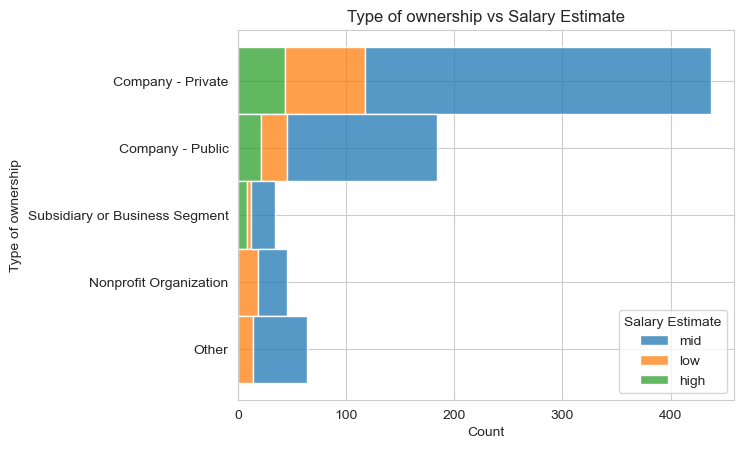

In [81]:
# Type of ownership vs Salary Estimate

g=sns.histplot(data=X_train, y="Type of ownership", hue=y_train, multiple="stack")
g.set(title='Type of ownership vs Salary Estimate')

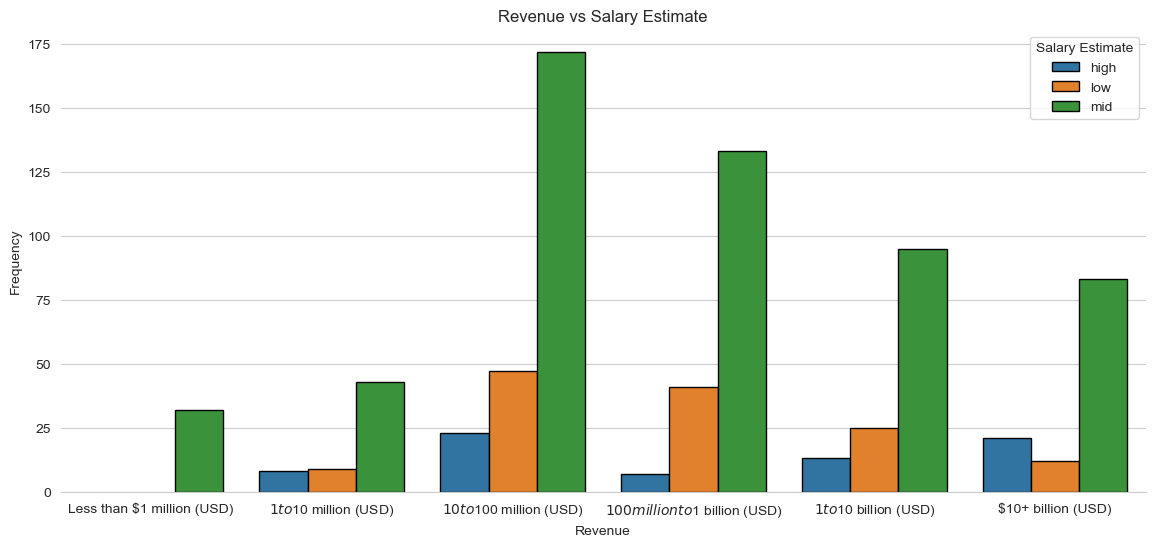

In [82]:
# Revenue Vs Salary Estimate

table = X_train.groupby(['Revenue', y_train]).size().reset_index(name='Frequency')

table.columns = ["Revenue", "Salary Estimate", "Frequency"]

size_order = ['Less than $1 million (USD)','$1 to $10 million (USD)', '$10 to $100 million (USD)','$100 million to $1 billion (USD)', 
              '$1 to $10 billion (USD)', '$10+ billion (USD)']

plt.figure(figsize=(14, 6))
sns.barplot(data=table, x='Revenue', y='Frequency', hue='Salary Estimate',  edgecolor='black', order=size_order).set(title='Revenue vs Salary Estimate')

sns.set_style("whitegrid")
sns.despine(left=True)
plt.show()

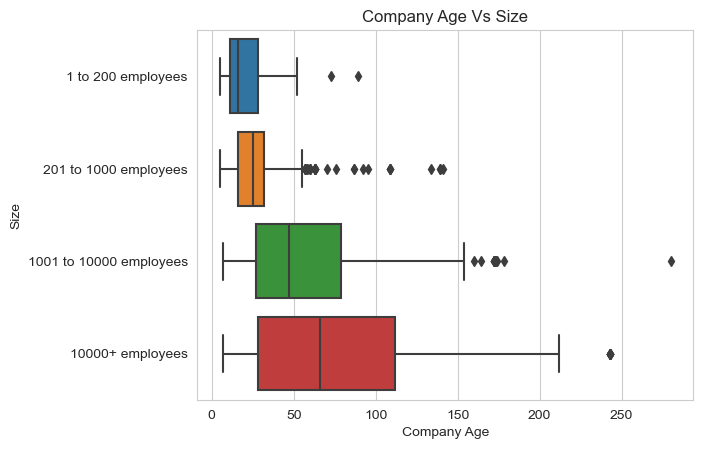

In [83]:
# Company Age Vs size

size_order = ['1 to 200 employees', '201 to 1000 employees', '1001 to 10000 employees','10000+ employees']

# Create the boxplot with the specified order
sns.boxplot(data=X_train, x='Company Age', y='Size', order=size_order)
plt.title('Company Age Vs Size')
plt.show()

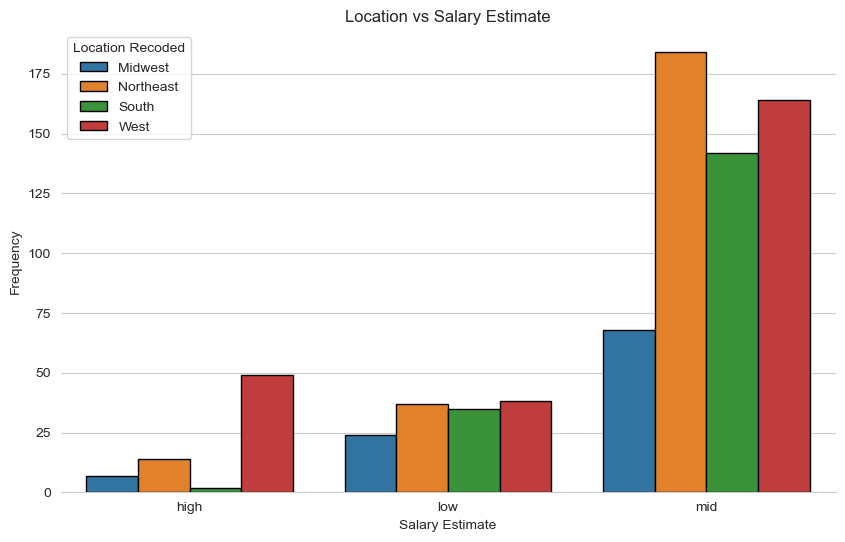

In [84]:
# location and salary estimate

table = X_train.groupby(['Location Recoded', y_train]).size().reset_index(name='Frequency')

table.columns = ["Location Recoded", "Salary Estimate", "Frequency"]

plt.figure(figsize=(10, 6))
sns.barplot(data=table, x='Salary Estimate', y='Frequency', hue='Location Recoded',  edgecolor='black').set(title='Location vs Salary Estimate')

sns.set_style("whitegrid")
sns.despine(left=True)
plt.show()

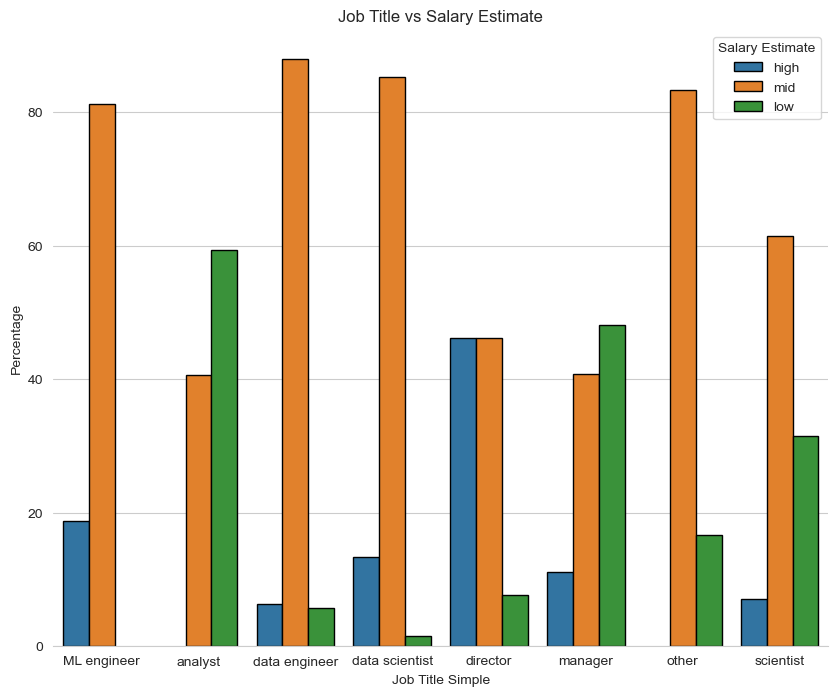

In [85]:
# Job Title Vs Salary Estimate

table = X_train.groupby(['Job Title Simple', y_train]).size().reset_index(name='Frequency')
table['Percentage'] = table.groupby('Job Title Simple')['Frequency'].transform(lambda x: x / x.sum() * 100)
plt.figure(figsize=(10, 8))
sns.barplot(data=table, x='Job Title Simple', y='Percentage', hue='Salary Estimate', edgecolor='black').set(title='Job Title vs Salary Estimate')

sns.set_style("whitegrid")
sns.despine(left=True)
plt.show()

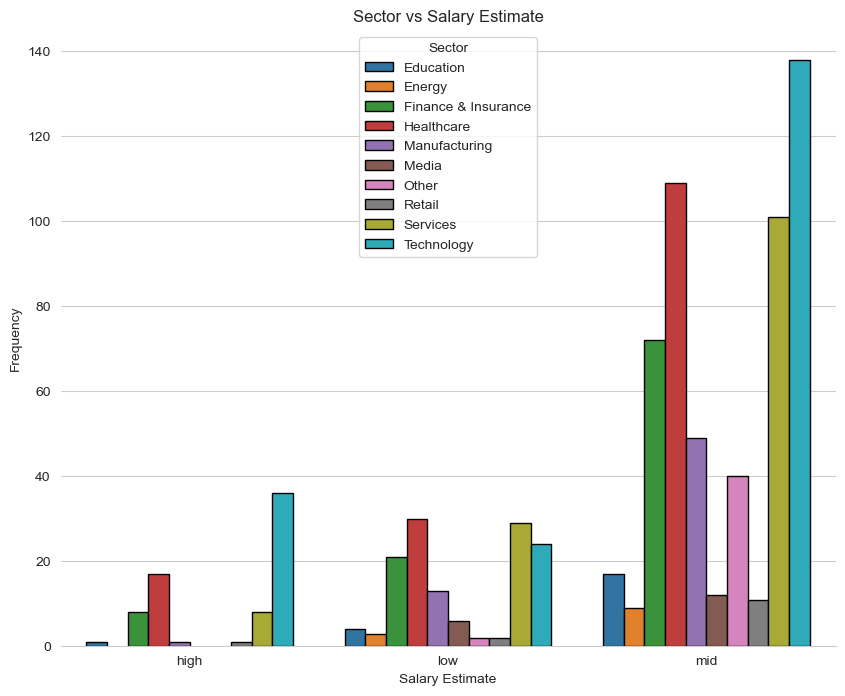

In [86]:
# Sector Vs Salary Estimate

table = X_train.groupby(['Sector', y_train]).size().reset_index(name='Frequency')

table.columns = ["Sector", "Salary Estimate", "Frequency"]

plt.figure(figsize=(10,8))
sns.barplot(data=table, x='Salary Estimate', y='Frequency', hue='Sector',  edgecolor='black').set(title='Sector vs Salary Estimate')

sns.set_style("whitegrid")
sns.despine(left=True)
plt.show()

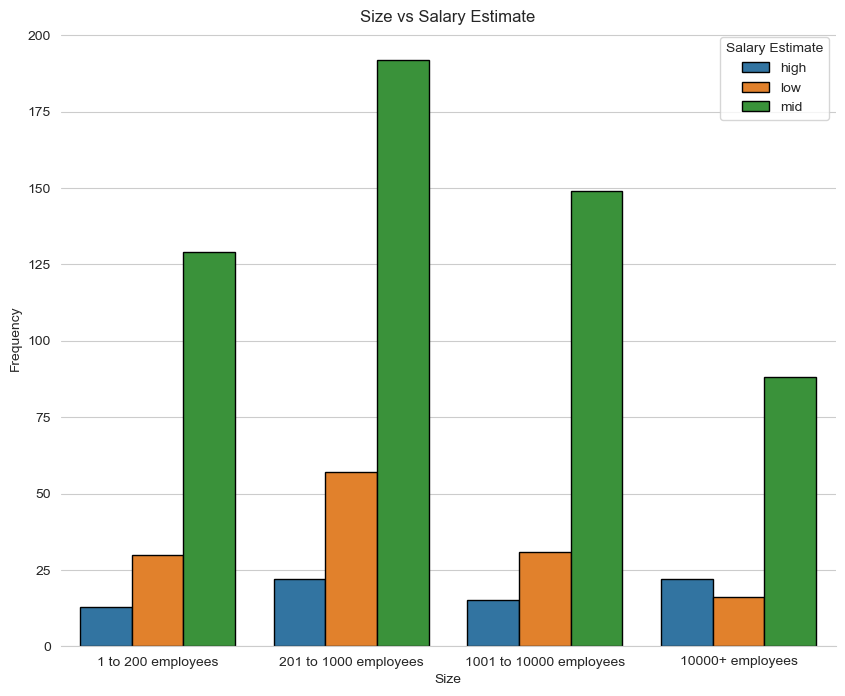

In [87]:
# Size Vs Salary Estimate

table = X_train.groupby(['Size', y_train]).size().reset_index(name='Frequency')
size_order = ['1 to 200 employees', '201 to 1000 employees', '1001 to 10000 employees','10000+ employees']

table.columns = ["Size", "Salary Estimate", "Frequency"]

plt.figure(figsize=(10,8))
sns.barplot(data=table, x='Size', y='Frequency', hue='Salary Estimate',  edgecolor='black', order =size_order).set(title='Size vs Salary Estimate')

sns.set_style("whitegrid")
sns.despine(left=True)
plt.show()

In [88]:
pip install dython


Note: you may need to restart the kernel to use updated packages.


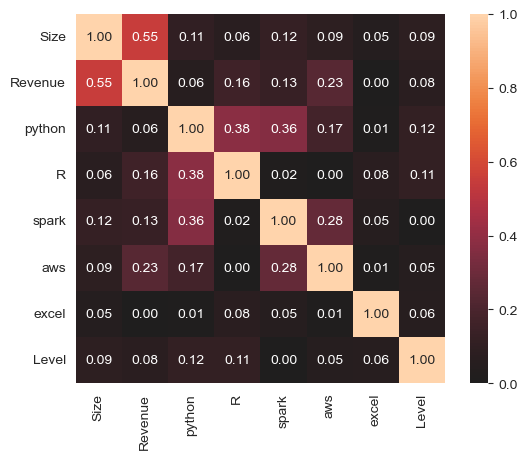

In [89]:
# Goodman and Kruskal's gamma values

from dython.nominal import associations

g_f = X_train.select_dtypes(exclude=['float64'])

columns_to_drop = ['Headquarters Recoded', 'Location Recoded', 'Type of ownership', 'Sector', 'Job Title Simple']
g_f = g_f.drop(columns=columns_to_drop, axis=1)

# Calculate associations and retrieve Goodman and Kruskal's gamma values
association_results = associations(g_f, nominal_columns='all', plot=True)

## Factor Analysis

In [90]:
pip install prince

Note: you may need to restart the kernel to use updated packages.


In [91]:
import prince 
famd = prince.FAMD(
    n_components=46,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error"  # same parameter as sklearn.preprocessing.OneHotEncoder
)

famd = famd.fit(X_train)

famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,20.697,7.53%,7.53%
1,16.035,5.83%,13.36%
2,14.237,5.18%,18.53%
3,13.530,4.92%,23.45%
4,12.507,4.55%,28.00%
5,11.503,4.18%,32.18%
6,10.654,3.87%,36.06%
7,10.332,3.76%,39.82%
8,9.720,3.53%,43.35%


In [92]:
famd.column_contributions_.style.format('{:.0%}')

component,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
variable,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rating,1%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,1%,0%,0%,1%,0%,90%,3%,0%,0%
Company Age,2%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,1%,0%,1%,0%,0%,2%,0%,1%,4%,87%,0%,0%
Headquarters Recoded,2%,1%,3%,4%,4%,3%,1%,2%,0%,0%,0%,0%,0%,1%,1%,0%,1%,0%,0%,2%,0%,0%,0%,0%,0%,0%,0%,1%,2%,1%,1%,2%,0%,0%,0%,2%,1%,7%,0%,4%,6%,3%,0%,0%,10482778950127839068767511379968%,72244657040461809176543550767104%
Job Title Simple,1%,3%,1%,1%,1%,2%,3%,1%,4%,3%,3%,2%,2%,6%,6%,3%,2%,7%,7%,3%,3%,3%,2%,4%,4%,4%,3%,4%,2%,2%,1%,2%,4%,1%,5%,1%,1%,1%,0%,0%,0%,1%,0%,0%,165069252325068046225408618659840%,104815531843962627755561053061120%
Level,0%,0%,0%,0%,0%,0%,0%,0%,1%,0%,0%,1%,2%,0%,1%,5%,0%,2%,0%,5%,0%,3%,1%,3%,1%,1%,0%,1%,0%,0%,1%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,41827683149597436477107173588992%,56239342838201801690946750906368%
Location Recoded,1%,0%,3%,4%,3%,2%,1%,2%,0%,0%,0%,0%,0%,0%,0%,0%,1%,0%,0%,1%,0%,0%,0%,1%,0%,1%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,1%,6%,0%,4%,6%,3%,0%,0%,8774575356613166469850888929280%,76430536941376573310020314202112%
R,0%,1%,0%,0%,1%,0%,1%,0%,1%,0%,1%,0%,0%,1%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,1%,0%,1%,0%,0%,2%,1%,1%,1%,0%,1%,0%,0%,0%,0%,0%,0%,0%,2934078800771075026435082027008%,1068818954548031251048482996224%
Revenue,3%,2%,3%,2%,2%,2%,2%,3%,0%,4%,3%,1%,2%,1%,1%,1%,3%,1%,1%,2%,0%,4%,1%,1%,1%,2%,2%,1%,2%,3%,1%,1%,1%,1%,1%,1%,4%,0%,7%,3%,0%,3%,0%,1%,77171693045992839504229811879936%,41530997497720183547538054316032%
Sector,2%,2%,4%,2%,2%,4%,4%,2%,2%,3%,6%,4%,4%,5%,4%,5%,6%,3%,4%,2%,6%,3%,3%,4%,3%,5%,3%,4%,1%,2%,4%,4%,4%,2%,3%,6%,2%,0%,7%,1%,0%,1%,0%,0%,115732658429136425153448464351232%,76523721999044459282207797673984%


In [93]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 764 entries, 465 to 102
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rating                764 non-null    float64
 1   Size                  764 non-null    object 
 2   Type of ownership     764 non-null    object 
 3   Sector                764 non-null    object 
 4   Revenue               764 non-null    object 
 5   python                764 non-null    int64  
 6   R                     764 non-null    int64  
 7   spark                 764 non-null    int64  
 8   aws                   764 non-null    int64  
 9   excel                 764 non-null    int64  
 10  Level                 764 non-null    object 
 11  Company Age           764 non-null    float64
 12  Job Title Simple      764 non-null    object 
 13  Location Recoded      764 non-null    object 
 14  Headquarters Recoded  764 non-null    object 
dtypes: float64(2), int64(5), o

# Fitting Models

## Random Forest on unfiltered data

In [94]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score

# Define ordinal and categorical columns
binary_col = ['python','R','spark','aws','excel']
ordinal_cols = ["Size", "Revenue",'Level']
categorical_cols = ["Type of ownership", "Sector",'Job Title Simple','Location Recoded','Headquarters Recoded']

# Create transformers for numerical, ordinal, and categorical columns
numeric_transformer = StandardScaler()

encoder1 = OrdinalEncoder(categories=[['1 to 200 employees', '201 to 1000 employees', '1001 to 10000 employees','10000+ employees']])
encoder2 = OrdinalEncoder(categories=[['Less than $1 million (USD)', '$1 to $10 million (USD)', '$10 to $100 million (USD)','$100 million to $1 billion (USD)','$1 to $10 billion (USD)','$10+ billion (USD)']])
encoder3 = OrdinalEncoder(categories=[['junior', 'normal', 'senior']])

categorical_transformer = OneHotEncoder()

# Create a column transformer to apply transformations to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, X.select_dtypes(include=['float64']).columns),
        ("ord1", encoder1, ['Size']),
        ("ord2", encoder2, ['Revenue']),
        ("ord3", encoder3, ['Level']),
        ("cat", categorical_transformer, categorical_cols),
        ("bin", 'passthrough', binary_col),
    ])

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', rf_model)])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# By using a pipeline, you can streamline the workflow and ensure that the preprocessing steps are applied consistently to both the training and testing data.
# It also simplifies the process of model evaluation and deployment.


Accuracy: 0.9114583333333334


In [95]:
"""from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and model from the grid search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Predict on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")"""


'from sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid for Random Forest\nparam_grid = {\n    \'classifier__n_estimators\': [50, 100, 200],\n    \'classifier__max_depth\': [None, 10, 20, 30],\n    \'classifier__min_samples_split\': [2, 5, 10],\n    \'classifier__min_samples_leaf\': [1, 2, 4]\n}\n\n# Create a GridSearchCV object with the pipeline and parameter grid\ngrid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=\'accuracy\', n_jobs=-1)\n\n# Fit the grid search on the training data\ngrid_search.fit(X_train, y_train)\n\n# Get the best parameters and model from the grid search\nbest_params = grid_search.best_params_\nbest_model = grid_search.best_estimator_\n\n# Print the best parameters\nprint("Best Parameters:", best_params)\n\n# Predict on the test data using the best model\ny_pred = best_model.predict(X_test)\n\n# Evaluate the model\naccuracy = accuracy_score(y_test, y_pred)\nprint(f"Accuracy: {accuracy}")'

## Random Forest on filtered data

In [96]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-validated Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")


Cross-validated Accuracy: 0.8704 (+/- 0.0412)


## XG Boost

In [97]:
#pip install xgboost

In [98]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [99]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [100]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
xgb_model = XGBClassifier(enable_categorical=True)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', xgb_model)])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train_encoded)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.890625


## SVM

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Create SVC pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'classifier__C': [0.1, 1, 10, 15, 20, 30],
    'classifier__kernel': ['linear', 'poly', 'rbf']
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)

print(f"Best Model Test Accuracy: {test_accuracy}")
print(f"Best Hyperparameters: {grid_search.best_params_}")


Best Model Test Accuracy: 0.8958333333333334
Best Hyperparameters: {'classifier__C': 15, 'classifier__kernel': 'poly'}


## Clustering

In [102]:
trainnset = pd.concat([X_train, y_train], axis=1)

In [103]:
import pandas as pd

# Assuming 'df' is your DataFrame
has_nan_values = trainnset.isna().any().any()

if has_nan_values:
    print("The DataFrame has NaN values.")
else:
    print("The DataFrame does not have any NaN values.")

The DataFrame does not have any NaN values.


In [104]:
# Install necessary libraries
# pip install kmodes scikit-learn pandas matplotlib

import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming your mixed-type data is stored in a DataFrame called 'df'

# Step 1: Separate numerical, categorical and binary categorical columns
df_num=trainnset[['Rating','Company Age']]
df_cat=trainnset[['Size','Type of ownership','Sector','Revenue','Level','Job Title Simple','Location Recoded','Headquarters Recoded','Salary Estimate']]
df_bicat = trainnset[['python','R','spark','aws','excel']]

numerical_cols = df_num.columns
categorical_cols = df_cat.columns
binary_categorical_cols = df_bicat.columns

# Exclude binary categorical columns from numerical_cols
numerical_cols = [col for col in numerical_cols if col not in binary_categorical_cols]

# Step 2: Normalize numerical columns if necessary
scaler = StandardScaler()
trainnset[numerical_cols] = scaler.fit_transform(trainnset[numerical_cols])


In [105]:
# Combine numerical, normal categorical, and binary categorical data into one array
X = pd.concat([
    trainnset[numerical_cols],
    pd.get_dummies(trainnset[categorical_cols]),
    trainnset[binary_categorical_cols]
], axis=1)

In [106]:
# Determine the optimal number of clusters using the elbow method
cost = []
for num_clusters in range(1, 11):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao', verbose=0)
    clusters = kproto.fit_predict(X, categorical=list(range(len(numerical_cols), len(X.columns))))
    cost.append(kproto.cost_)

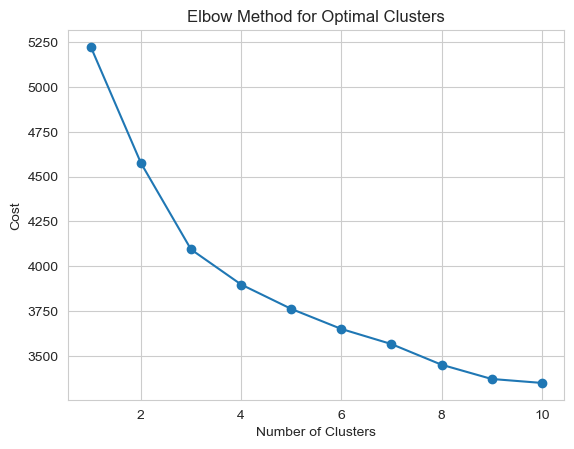

In [107]:
# Plot the elbow curve
plt.plot(range(1, 11), cost, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [108]:
# Choose the optimal number of clusters and perform clustering
optimal_clusters = 3  # You should choose based on the elbow method or other criteria
kproto = KPrototypes(n_clusters=optimal_clusters, init='Cao', verbose=0)
clusters = kproto.fit_predict(X, categorical=list(range(len(numerical_cols), len(X.columns))))

In [109]:
# Calculate silhouette score
silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.10062127645539577


In [110]:
# Create silhouette plot
sample_silhouette_values = silhouette_samples(X, clusters)

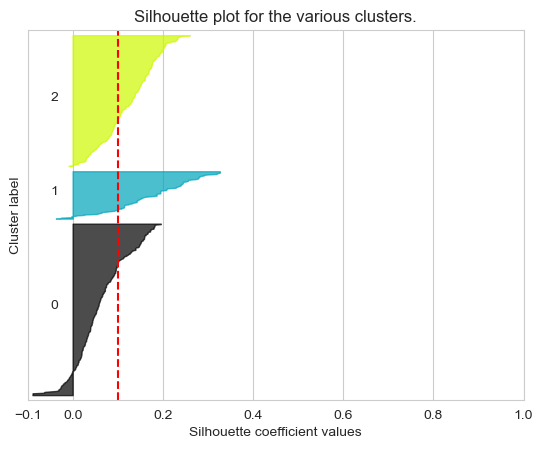

In [111]:
# Create a subplot with 1 row and 1 column
fig, ax = plt.subplots(1, 1)

# The silhouette coefficient can range from -1, 1
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X) + (optimal_clusters + 1) * 10])

y_lower = 10

for i in range(optimal_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / optimal_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax.set_title("Silhouette plot for the various clusters.")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

# The vertical line for the average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Clear the y-axis labels/ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [153]:
from sklearn.metrics import silhouette_score

# Assuming 'X' is your feature matrix and 'clusters' is the cluster labels
silhouette_avg = silhouette_score(X, clusters)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.07091419737815208
